# 探索数据集

Richardz

2023-02-12

## 导入工具包

In [25]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm
import os.path as osp

import mmcv
import mmengine

import matplotlib.pyplot as plt
%matplotlib inline

/home/richardz/anaconda3/envs/openmmlab2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 指定图像和标注文件夹路径

In [14]:
# 数据集图片和标注路径
data_root = 'nails_segmentation'
img_dir = 'images'
ann_dir = 'labels'

# 类别和对应的颜色
classes = ('nail', 'bg')
palette = [[255, 255, 255], [0,0,0]]

In [15]:
PATH_IMAGE = osp.join(data_root, img_dir)
PATH_MASKS = osp.join(data_root, ann_dir)

In [16]:
print('图像个数', len(os.listdir(PATH_IMAGE)))
print('标注个数', len(os.listdir(PATH_MASKS)))

图像个数 52
标注个数 52


## 查看单张图像及其语义分割标注

In [17]:
# 指定图像文件名
file_name = '09aefeec-e05f-11e8-87a6-0242ac1c0002.jpg'

In [18]:
img_path = os.path.join(PATH_IMAGE, file_name)
mask_path = os.path.join(PATH_MASKS, file_name)

print('图像路径', img_path)
print('标注路径', mask_path)

图像路径 nails_segmentation/images/09aefeec-e05f-11e8-87a6-0242ac1c0002.jpg
标注路径 nails_segmentation/labels/09aefeec-e05f-11e8-87a6-0242ac1c0002.jpg


In [19]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [20]:
img.shape

(340, 750, 3)

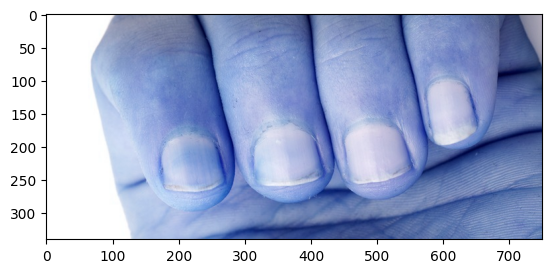

In [21]:
# 可视化图像
plt.imshow(img)
plt.show()

In [22]:
mask.shape

(340, 750, 3)

In [23]:
# mask 语义分割标注，与原图大小相同，0 为 背景， 1 为 肾小球
np.unique(mask)

array([  0,   1, 254, 255], dtype=uint8)

In [26]:
for filename in mmengine.scandir(osp.join(data_root, ann_dir), suffix='.jpg'):
    file = osp.join(data_root, ann_dir, filename)
    print(file)
    image_array = cv2.imread(file)
    image_array[image_array < 100] = 0
    image_array[image_array > 250] = 1
    print(np.any(image_array == 2))
    #image_array[image_array == 2] = 0
    new_name = osp.splitext(filename)[0] + ".png"
    new_file = osp.join(data_root, ann_dir, new_name)
    cv2.imwrite(new_file, image_array)

nails_segmentation/labels/d97db2d2-18ff-456d-8d85-23bfb7109aef.jpg
False
nails_segmentation/labels/4c47ee66-e402-11e8-97db-0242ac1c0002.jpg
False
nails_segmentation/labels/af5626a5-feb4-4b2a-8c57-152e443ea3dc.jpg
False
nails_segmentation/labels/d61a32a0-db67-11e8-9658-0242ac1c0002.jpg
False
nails_segmentation/labels/d6072ec6-db67-11e8-9658-0242ac1c0002.jpg
False
nails_segmentation/labels/4c472e18-e402-11e8-97db-0242ac1c0002.jpg
False
nails_segmentation/labels/2C29D473-CCB4-458C-926B-99D0042161E6.jpg
False
nails_segmentation/labels/865a1e90-7ad2-4ceb-b2a1-50b07875c5c7.jpg
False
nails_segmentation/labels/4c4a6402-e402-11e8-97db-0242ac1c0002.jpg
False
nails_segmentation/labels/41d83dbb-7c39-4d91-979e-eec5ff71b265.jpg
False
nails_segmentation/labels/4c484f8c-e402-11e8-97db-0242ac1c0002.jpg
False
nails_segmentation/labels/869CDA2E-8251-4880-89D6-9409CBC416F3.jpg
False
nails_segmentation/labels/d6321726-db67-11e8-9658-0242ac1c0002.jpg
False
nails_segmentation/labels/7e9f5818-4425-4d8a-808a-4

在本数据集中，只有一部分图像有肾小球语义分割标注（即mask中值为1的像素），其余图像mask的值均为0

In [32]:
new_label =  '09aefeec-e05f-11e8-87a6-0242ac1c0002.png'

In [33]:
mask = cv2.imread(osp.join(data_root, ann_dir, new_label))

In [34]:
mask.shape

(340, 750, 3)

In [35]:
np.unique(mask)

array([0, 1], dtype=uint8)

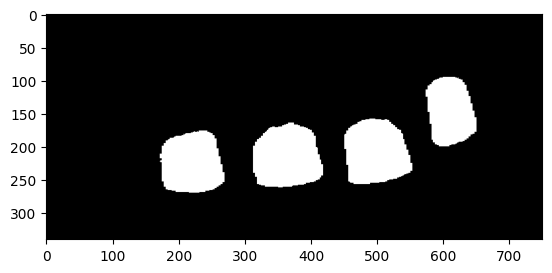

In [36]:
# 可视化语义分割标注
plt.imshow(mask*255)
plt.show()

## 可视化单张图像及其语义分割标注-代码模板

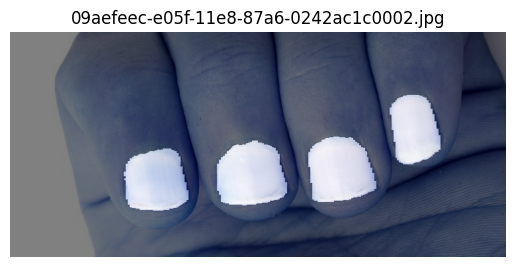

In [37]:
plt.imshow(img)
plt.imshow(mask*255, alpha=0.5) # alpha 高亮区域透明度，越小越接近原图
plt.title(file_name)
plt.axis('off')
plt.show()

## 可视化模板-有前景标注

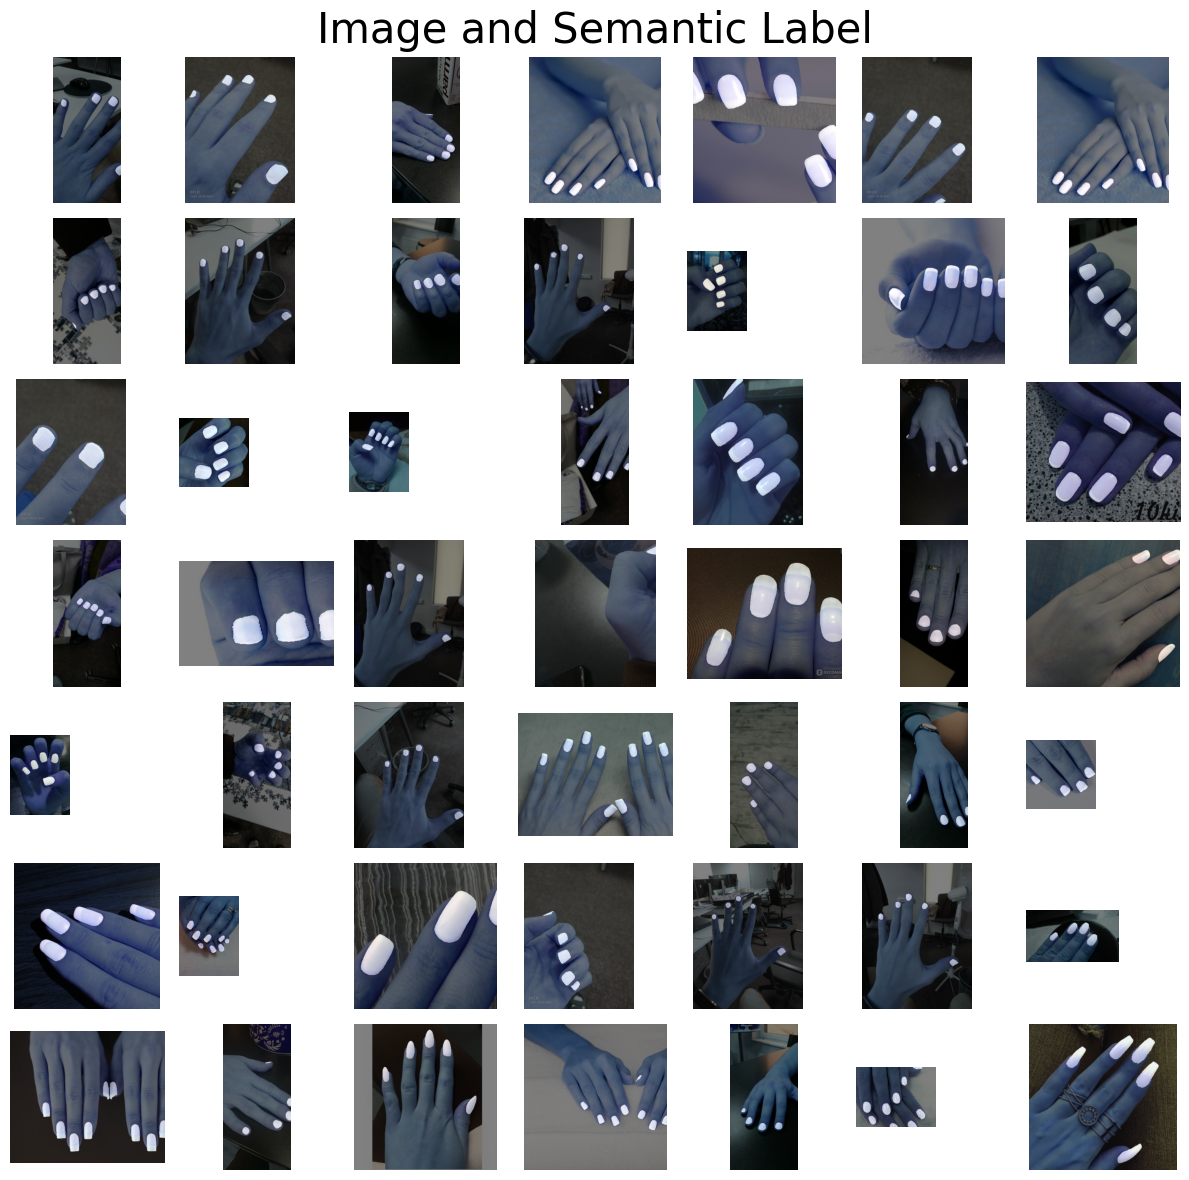

In [41]:
# n行n列可视化
n = 7

# 标注区域透明度
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

i = 0

for file_name in os.listdir(PATH_IMAGE):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0] + ".png")
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    if 1 in mask:
        axes[i//n, i%n].imshow(img)
        axes[i//n, i%n].imshow(mask*255, alpha=opacity)
        axes[i//n, i%n].axis('off') # 关闭坐标轴显示
        i += 1
    if i > n**2-1:
        break
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()

## 可视化模板-无论前景是否有标注

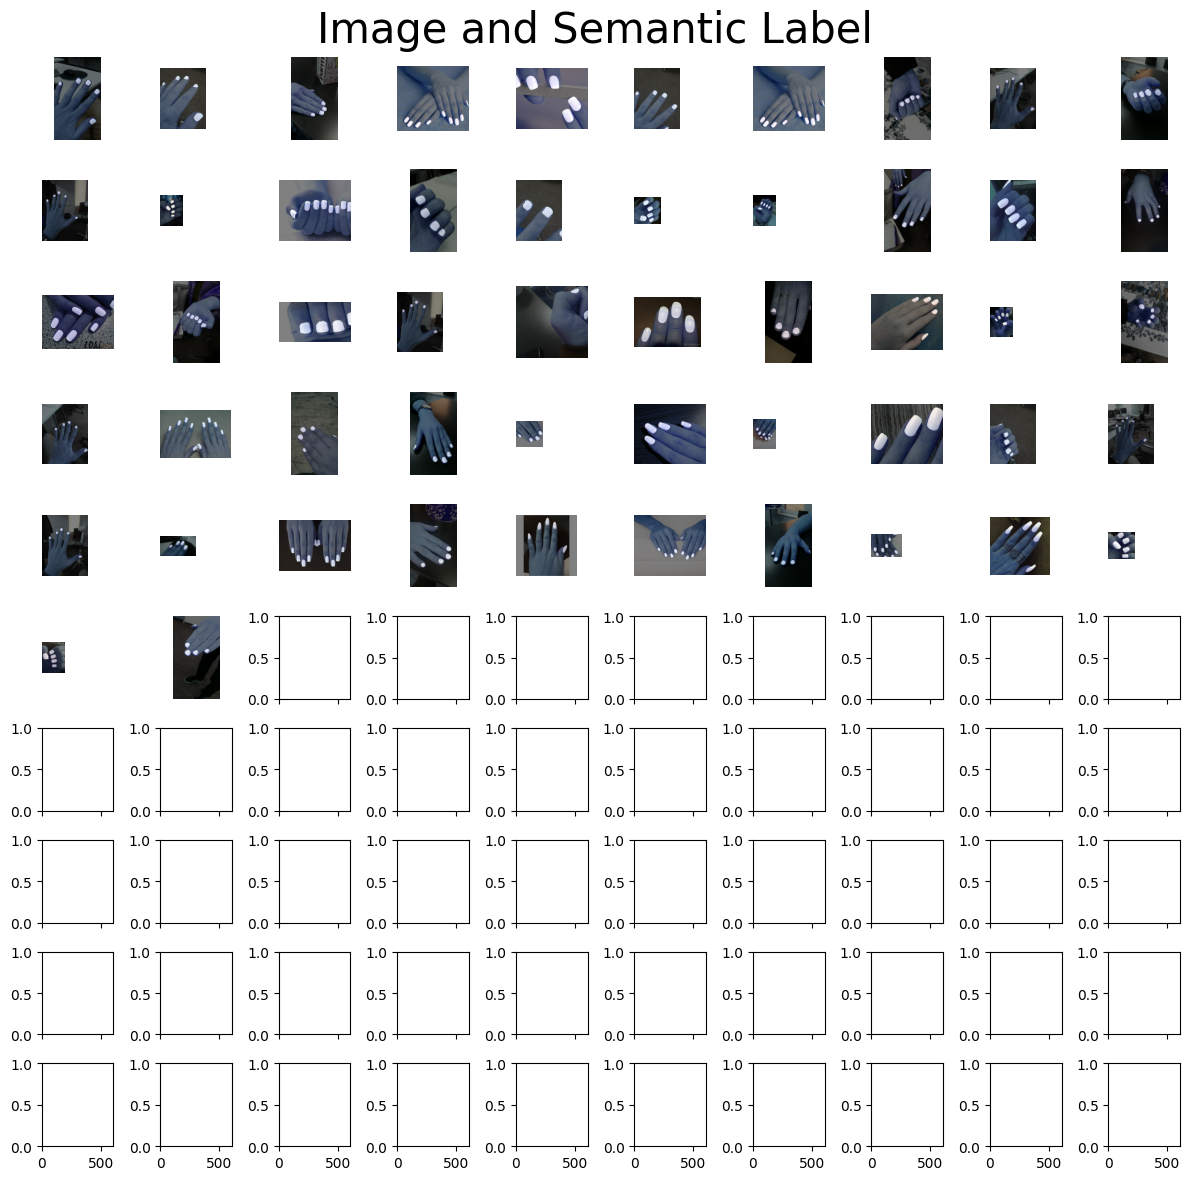

In [42]:
# n行n列可视化
n = 10

# 标注区域透明度
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0] + ".png")
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    # 可视化
    axes[i//n, i%n].imshow(img)
    axes[i//n, i%n].imshow(mask*255, alpha=opacity)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()